In [3]:
import pandas as pd
import plotly.graph_objects as go


df = pd.read_csv('data/binance/BTCUSDT_1m_Futures.csv', index_col=0, parse_dates=True)
data = df[['Open', 'High', 'Low', 'Close', 'Volume']][-100000:]

In [4]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-23 03:47:00,64502.6,64502.6,64465.0,64478.1,46.384
2024-03-23 03:48:00,64478.1,64549.8,64475.2,64518.6,249.249
2024-03-23 03:49:00,64518.6,64535.2,64512.3,64535.2,91.411
2024-03-23 03:50:00,64535.1,64535.1,64421.5,64441.9,277.644
2024-03-23 03:51:00,64441.9,64442.0,64387.3,64402.3,228.915
...,...,...,...,...,...
2024-05-31 14:22:00,67422.1,67437.7,67422.1,67433.2,28.156
2024-05-31 14:23:00,67433.2,67449.6,67433.1,67449.6,22.225
2024-05-31 14:24:00,67449.6,67480.1,67443.8,67480.0,49.857


In [7]:
# fig = go.Figure(data=[go.Candlestick(x=data.index,
#                 open=data['Open'],
#                 high=data['High'],
#                 low=data['Low'],
#                 close=data['Close'])])
# fig.update_layout(
#     autosize=False,
#     width=1000,
#     height=500,
#     margin=dict(
#         l=10,
#         r=10,
#         b=10,
#         t=10,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )
# fig.update_yaxes(fixedrange=False)
# fig.show()


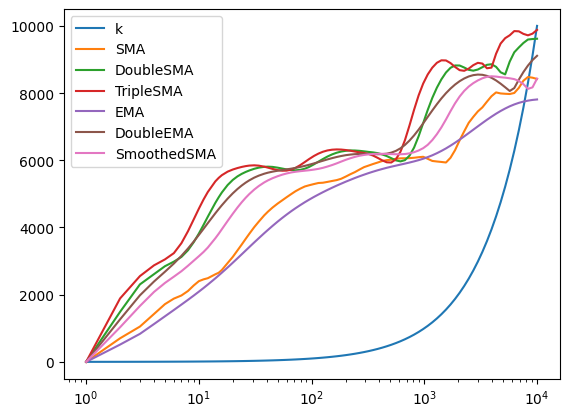

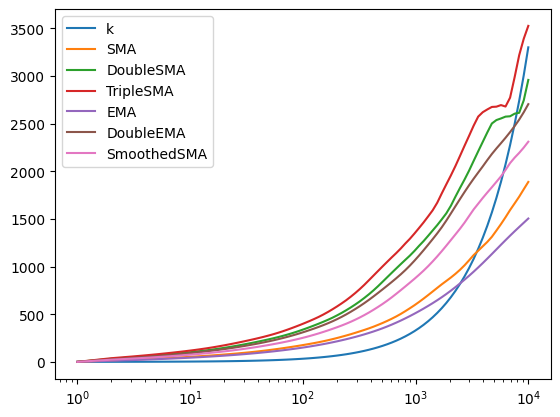

/tmp/ipykernel_174757/90677835.py:51: RuntimeWarning:

invalid value encountered in divide



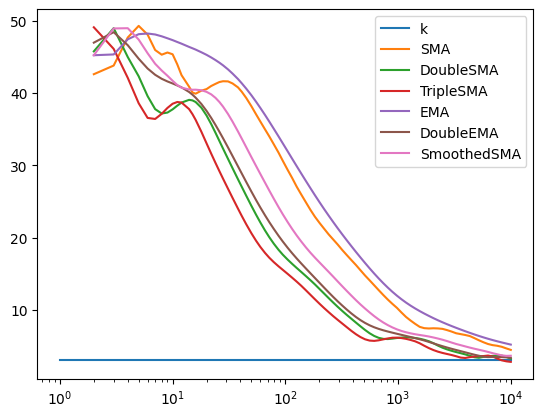

In [8]:
from matplotlib import pyplot as plt
import numpy as np

indicators = pd.DataFrame(index=data.index)

x = np.unique(np.round(np.logspace(0, 4, 100)).astype(int))

max_h = []

avg_h = []

for k in x:
    
    indicators['SMA'] = data['Close'].rolling(window=k).mean().round(1)
    
    indicators['DoubleSMA'] = indicators['SMA'].rolling(window=k).mean().rolling(window=k).mean().round(1)
    
    indicators['TripleSMA'] = indicators['DoubleSMA'].rolling(window=k).mean().round(1)
    
    indicators['EMA'] = data['Close'].ewm(span=k).mean().round(1)
    
    indicators['DoubleEMA'] = indicators['EMA'].ewm(span=k).mean().ewm(span=k).mean().round(1)
    
    indicators['SmoothedSMA'] = data['Close'].rolling(window=k).mean().ewm(span=k).mean().round(1)
    
    
    max_diff = [k]
    
    avg_diff = [k*0.33]
    
    for col in indicators.columns:
        max_diff.append((data['Close'] - indicators[col]).abs().max().round(0))
        avg_diff.append((data['Close'] - indicators[col]).abs().mean())
        

    max_h.append(max_diff)
    avg_h.append(avg_diff)
    
n = ['k'] + indicators.columns.to_list()
    
plt.plot(x, max_h, label=n)
plt.legend()
plt.xscale('log')
plt.show()
plt.plot(x, avg_h, label=n)
plt.legend()
plt.xscale('log')
plt.show()


plt.plot(x, np.array(max_h)/np.array(avg_h), label=n)
plt.legend()
plt.xscale('log')